In [1]:
%matplotlib inline
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.ndimage.filters import gaussian_filter

from app.models import ExperimentResult

In [11]:
def f(x):
    return (97.78*(x)+0.910)/10000

def inst_to_df(inst):
    i = json.loads(inst.i)
    v = json.loads(inst.v)
    df = pd.DataFrame.from_dict({'i': i, 'v': v})\
            .sort_values(by=['v'])
        
    X = df.v.values.reshape([df.v.shape[0], 1])
    Y = df.i
    n = 500
    model = make_pipeline(\
                PolynomialFeatures(5), 
                RandomForestRegressor(n_estimators=100, min_samples_split=100)\
            ).fit(X, Y)
#     X_ = np.linspace(df.v.min(), df.v.max(), n)
    X_ = np.linspace(15, 756, n)
    mdf = pd.DataFrame.from_dict({'v':X_, 'i':model.predict(X_.reshape(-1, 1))})
    mdf.i = gaussian_filter(mdf.i, sigma=20)
    mdf = mdf.round(3)

    mdf.v = (mdf.v/4095)*5.0 
    mdf.i = ((mdf.i/4095)*5.0)/(0.033)
    mdf.v = round(mdf.v,3)
    
    mdf = mdf.groupby('v', as_index=False).mean()
    return mdf 

def region(df):
    return df[(df.v>0.35)&(df.v<0.55)]

# def peak(df):
#     return df[df.v==0.47].i.max()

# def _find_peak(pk):
#     try:
#         inst = ExperimentResult.objects.get(pk=pk)
#         return peak(inst_to_df(inst))
#     except Exception as err:
#         return None

In [12]:
exp_result = pd.read_csv('experiment_result.csv')
edf = exp_result.copy()
edf = edf.dropna()
edf

,exp,aa,ua,cell,lopp
0,1459,0.1,0.50,170,5
1,1460,0.1,0.50,170,5
2,1461,0.1,0.50,170,5
3,1462,0.1,0.50,150,5
4,1463,0.1,0.50,150,5
5,1464,0.1,0.50,150,5
6,1465,0.1,0.50,130,5
7,1466,0.1,0.50,130,5
8,1467,0.1,0.50,130,5
9,1468,0.1,0.50,130,5


In [13]:
df = None
rows = list()
for idx, row in edf.iterrows():
    try:
        inst = ExperimentResult.objects.get(pk=row.exp)
        lst = region(inst_to_df(inst))['i'].tolist()
        lst.append(row.cell)
        lst.append(row.ua)
        rows.append( lst )
    except Exception as err:
        print(err)
        pass
#     try:
#         _edf = edf.loc[edf.exp==pk]
#         inst = ExperimentResult.objects.get(pk=pk)
#         lst = region(inst_to_df(inst))['i'].tolist()
#         lst.append(_edf.cell.values[0])
        

(109, 2)
170.0 0.5
(109, 2)
170.0 0.5
(109, 2)
170.0 0.5
(109, 2)
150.0 0.5
(109, 2)
150.0 0.5
(109, 2)
150.0 0.5
(109, 2)
130.0 0.5
(109, 2)
130.0 0.5
(109, 2)
130.0 0.5
(109, 2)
130.0 0.5
(109, 2)
130.0 0.5
(109, 2)
130.0 0.5
(109, 2)
130.0 0.5
(109, 2)
130.0 0.5
(109, 2)
130.0 0.5
arrays must all be same length
arrays must all be same length
arrays must all be same length
(109, 2)
130.0 0.1
(109, 2)
130.0 0.1
(109, 2)
130.0 0.1
(109, 2)
170.0 0.1
(109, 2)
170.0 0.1
(109, 2)
170.0 0.1
(109, 2)
160.0 0.1
(109, 2)
160.0 0.1
(109, 2)
160.0 0.1
(109, 2)
130.0 0.1
(109, 2)
130.0 0.1
(109, 2)
130.0 0.1
(109, 2)
120.0 0.05
(109, 2)
120.0 0.05
(109, 2)
120.0 0.05
(109, 2)
140.0 0.05
(109, 2)
140.0 0.05
(109, 2)
140.0 0.05
(109, 2)
140.0 0.05
(109, 2)
140.0 0.05
(109, 2)
140.0 0.05
(109, 2)
130.0 0.05
(109, 2)
130.0 0.05
(109, 2)
130.0 0.05
(109, 2)
130.0 0.05
(109, 2)
130.0 0.05
(109, 2)
130.0 0.05
(109, 2)
200.0 0.05
(109, 2)
200.0 0.05
(109, 2)
200.0 0.05
(109, 2)
200.0 0.04
(109, 2)
200.0

In [14]:
df = pd.DataFrame(rows)

In [53]:
df = df[df[110]<0.1]

In [54]:
X = df.loc[:, :109]
Y = df[110]

In [55]:
X.shape

(63, 110)

In [56]:
Y.shape

(63,)

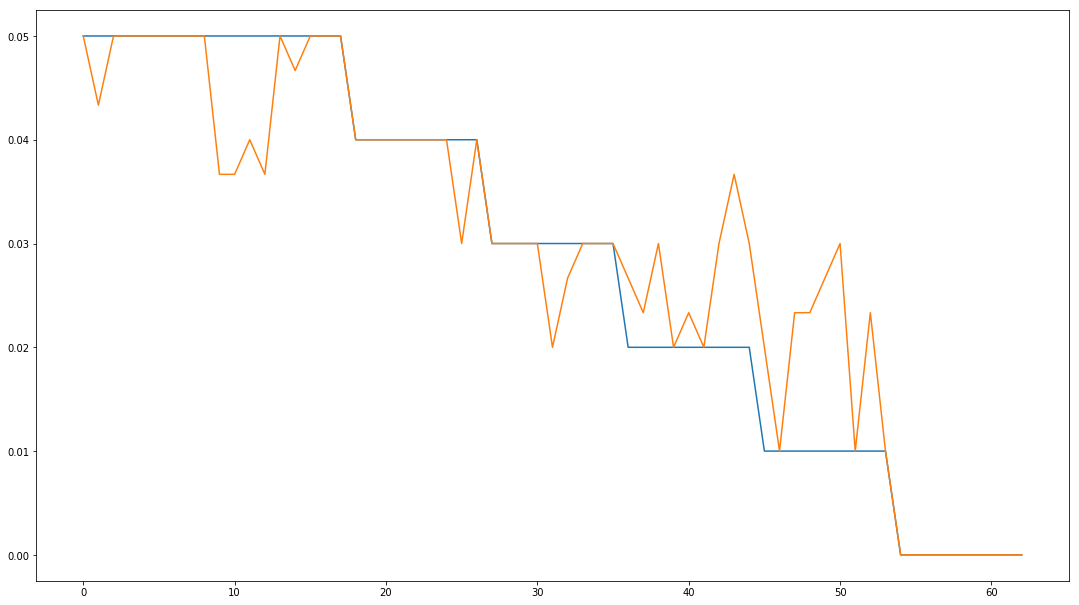

In [63]:

model = make_pipeline(\
            PolynomialFeatures(3), 
            RandomForestRegressor(n_estimators=3,)\
        ).fit(X, Y)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
idx = list(range(Y.shape[0]))
ax.plot(idx, Y)
ax.plot(idx, model.predict(X))
# ax.plot(mdf.exp, model.predict(X))
plt.show()